## Classification of type of Glass

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [29]:
glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.Type.value_counts()  

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [4]:
## Data Visualizing and analyzing
corr = glass.corr()

<AxesSubplot:>

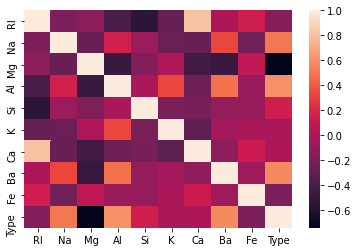

In [5]:
sns.heatmap(corr)

## We can notice that Ca and K values don't affect Type that much.
Also Ca and RI are highly correlated, this means using only RI is enough for predicting the type of glass, So we can drop Ca, and also K

<AxesSubplot:xlabel='RI', ylabel='Na'>

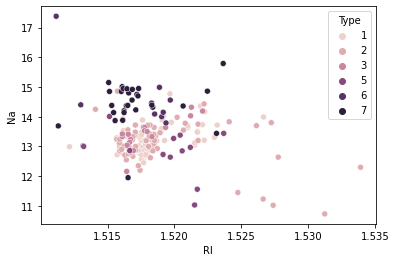

In [6]:
sns.scatterplot(glass['RI'],glass['Na'],hue=glass['Type'])

##### The pairplot shows that the data is not linear and KNN can be applied to get nearest neighbors and classify the glass types

In [31]:
## Standizing the values
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_glass = scale.fit_transform(glass.iloc[:,0:9])


In [32]:
glass_df = pd.DataFrame(scaled_glass,columns=glass.columns[:-1])
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [10]:
from sklearn.model_selection import train_test_split
glass_df = glass_df.drop(['Ca','K'],axis=1) #Removing features  Ca and K 
xtrain,xtest,ytrain,ytest  = train_test_split(glass_df,glass['Type'],test_size=0.3,random_state=45)

In [11]:
knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
knn1 = KNeighborsClassifier(n_neighbors=4,metric='manhattan')

In [12]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [13]:
y_pred = knn.predict(xtest)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))  ##we got moderate accuracy here 

              precision    recall  f1-score   support

           1       0.62      0.90      0.73        20
           2       0.82      0.54      0.65        26
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.50      0.50      0.50         2
           7       1.00      0.85      0.92        13

    accuracy                           0.68        65
   macro avg       0.49      0.46      0.47        65
weighted avg       0.74      0.68      0.69        65



In [15]:
knn1.fit(xtrain,ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [16]:
y_pred_manhattan = knn1.predict(xtest)

In [17]:
print(classification_report(ytest,y_pred_manhattan)) ## we got more accuracy than euclidean metric model

              precision    recall  f1-score   support

           1       0.69      0.90      0.78        20
           2       0.85      0.65      0.74        26
           3       0.00      0.00      0.00         3
           5       0.25      1.00      0.40         1
           6       0.50      0.50      0.50         2
           7       1.00      0.85      0.92        13

    accuracy                           0.74        65
   macro avg       0.55      0.65      0.56        65
weighted avg       0.77      0.74      0.74        65



In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)

0.676923076923077

In [19]:
accuracy_score(ytest,y_pred_manhattan) 
## from these we can see that from both the models we achieved accuracy of 73.8%

0.7384615384615385

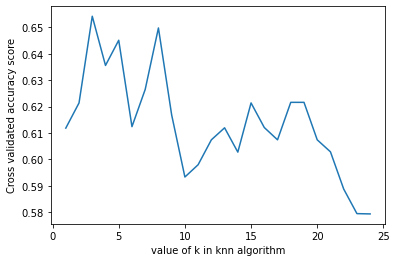

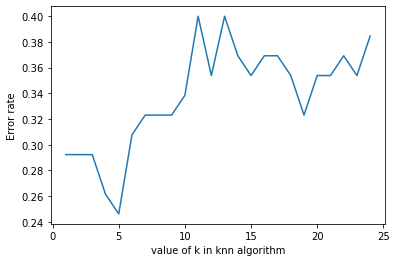

In [20]:
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'manhattan')
    scores = cross_val_score(knn,glass_df,glass['Type'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    
    #error rate
    knn.fit(xtrain,ytrain)
    y_pred = knn.predict(xtest)
    error_rate.append(np.mean(y_pred!=ytest))

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k in knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k in knn algorithm')
plt.ylabel('Error rate')
plt.show()


##### From the plot of error rate we can choose k value with least error 
so k = 5

In [21]:
## Builing KNN model with optimal value K = 5

kfold = KFold(n_splits = 30)
model = KNeighborsClassifier(n_neighbors = 5)
results = cross_val_score(model, xtrain, ytrain, cv = kfold)
results

array([0.8, 0.6, 0.6, 0.4, 0.6, 0.6, 0.8, 0.6, 0.8, 0.6, 0.6, 0.4, 0.8,
       0.8, 0.8, 0.4, 0.6, 0.6, 0.6, 0.8, 0.4, 0.8, 0.6, 0.8, 0.4, 0.8,
       0.8, 0.6, 0.4, 0.5])

In [22]:
print(results.mean())

0.6300000000000001


## GridSearch CV

In [23]:
## GridSearch CV for fine tuning of parameters
from sklearn.model_selection import GridSearchCV
n_neigh = np.array(range(1,10))
param_grid = dict(n_neighbors = n_neigh)
n_neigh

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
model1 = KNeighborsClassifier()
grid = GridSearchCV(estimator = model1, param_grid = param_grid)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [25]:
print(grid.best_score_)

0.7112643678160919


In [26]:
print(grid.best_params_)

{'n_neighbors': 4}


In [27]:
kfold = KFold(n_splits = 30)
model2 = KNeighborsClassifier(n_neighbors = 4)
results2 = cross_val_score(model2, xtrain, ytrain, cv = kfold)
results2

array([1. , 0.6, 0.6, 0.4, 0.4, 0.6, 0.6, 0.6, 0.8, 0.6, 0.6, 0.4, 0.8,
       1. , 0.8, 0.4, 0.6, 0.8, 0.6, 1. , 0.4, 0.8, 0.6, 1. , 0.6, 0.8,
       1. , 0.6, 0.6, 0.5])

In [28]:
results2.mean()

0.6700000000000002